<a href="https://colab.research.google.com/github/ronnieogwang/Self_Driving_car_course/blob/master/MNIST_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical 
import random

In [2]:
#seed random
np.random.seed(0)
'''Part 1, get and display dataset'''
#get dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#verify dataset, if condition is met, code executes else stops
assert(X_train.shape[0] == y_train.shape[0]), "The number of images not equal to labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images not equal to labels"
assert(X_train.shape[1:] == (28,28)), "Dimensions not 28 x 28"
assert(X_test.shape[1:] == (28,28)), "Dimensions not 28 x 28"

11493376/11490434 [==============================] - 1s 0us/step


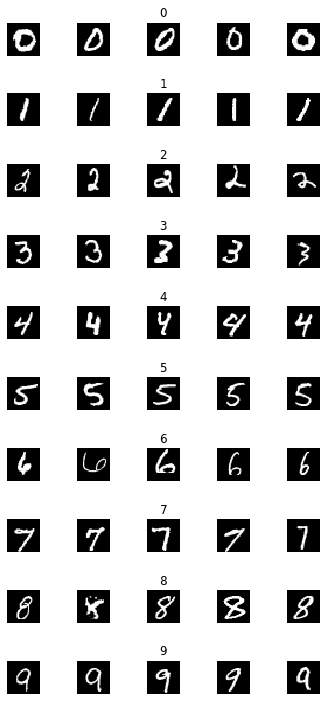

In [3]:
num_of_samples = []

cols = 5 #grid of 5 
classes = 10

#grid
fig, axs = plt.subplots(nrows = classes, ncols = cols, figsize = (5,10))  #subplots allows to plot many objects on one page, returns tuple 
fig.tight_layout()     #removes overlap
for i in range(cols):
    for j in range(classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

Text(0, 0.5, 'num of images')

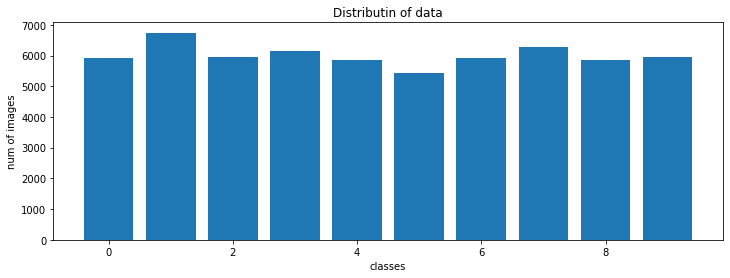

In [4]:
plt.figure(figsize=(12,4))
plt.bar(range(0,classes), num_of_samples)
plt.title("Distributin of data")
plt.xlabel('classes')
plt.ylabel('num of images') 

In [0]:
'''Part 2 Data preprocessing'''

#onehot encoding
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

#normalization to in a range 0 to 1, reduces variance in the data
X_train = X_train/255
X_test = X_test/255

#flatten images
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [8]:
def create_model():
    model = Sequential()
    model.add(Dense(786, input_dim = num_pixels, activation = 'relu'))
    model.add(Dense(10,  activation = 'relu'))
    model.add(Dense(classes, input_dim = num_pixels, activation = 'softmax'))
    model.compile(Adam(lr =0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model
    
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 786)               617010    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7870      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 624,990
Trainable params: 624,990
Non-trainable params: 0
_________________________________________________________________


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 26us/step - loss: 0.4549 - acc: 0.8584 - val_loss: 0.1471 - val_acc: 0.9568
Epoch 2/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.1282 - acc: 0.9637 - val_loss: 0.1154 - val_acc: 0.9687
Epoch 3/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0885 - acc: 0.9736 - val_loss: 0.0827 - val_acc: 0.9760
Epoch 4/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.0670 - acc: 0.9798 - val_loss: 0.1194 - val_acc: 0.9665
Epoch 5/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0606 - acc: 0.9816 - val_loss: 0.1059 - val_acc: 0.9723
Epoch 6/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.0523 - acc: 0.9837 - val_loss: 0.1079 - val_acc: 0.9748
Epoch 7/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.0462 - acc: 0.9864 - val_loss: 0.0880 - val_acc:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """


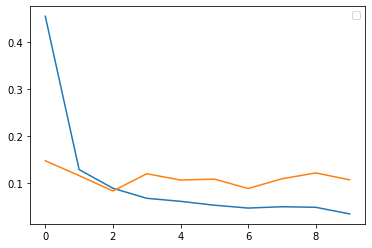

In [9]:
h =model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 200, verbose =1, shuffle= 1)

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend('loss', 'valloss')
